In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
def check_and_create_folder(folder_path, name_fold = "simu"):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        #return folder_path

    # Look for folders starting with "simu_"
    existing_folders = [name for name in os.listdir(folder_path) if name.startswith(f"{name_fold}_")]
    #print(f"{name}_")
    if not existing_folders:
        new_folder_name = f"{name_fold}_0001"
    else:
        # Sort the existing folders to find the highest numbered folder
        existing_folders.sort()
        last_folder_number = int(existing_folders[-1][len(name_fold)+1:])  # Extract the number from the folder name 
        #print(os.path.join(folder_path, existing_folders[-1]), len(os.listdir(os.path.join(folder_path, existing_folders[-1]))))   
        new_folder_number = last_folder_number  if  len(os.listdir(os.path.join(folder_path, existing_folders[-1]))) ==0 else last_folder_number +1
        #print(new_folder_number)
        new_folder_name = f"{name_fold}_{new_folder_number:04d}"

    new_folder_path = os.path.join(folder_path, new_folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    return new_folder_path

In [3]:
folder_path = check_and_create_folder("./imgs_random_depot_correct")

In [4]:
run_folder = "results_random_depot_correct/simu_0004"

edge_infos = sorted([f for f in os.listdir(run_folder) if "edge_info" in f], key=lambda x: int(x.split('_')[0]))
vehicle_infos = sorted([f for f in os.listdir(run_folder) if "vehicle_info" in f], key=lambda x: int(x.split('_')[0]))
road_infos = sorted([f for f in os.listdir(run_folder) if "road_info" in f], key=lambda x: int(x.split('_')[0]))
requests_info = sorted([f for f in os.listdir(run_folder) if "requests_info" in f], key=lambda x: int(x.split('_')[0]))

# Road Analysis

In [5]:
road_df = pd.DataFrame(columns=["edge"]+[i+1 for i in range(len(road_infos))])

In [6]:
number_of_requests = []
for i, road_info_name in enumerate(road_infos):
    n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    road_df["edge"] = ri_df["edge"]
    number_of_requests += [n+20]
    sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    road_df[n] = sum_rows


In [7]:
road_df.to_csv("test.csv")

In [8]:
road_df.columns

Index(['edge',      1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     12,     13,     14,     15,     16,     17,
           18,     19,     20,     21,     22,     23,     24,     25,     26,
           27,     28,     29,     30],
      dtype='object')

In [9]:
#plt.figure(figsize=(40, 6))
#max_value = road_df.drop("edge", inplace=False, axis=1).values.max()+1
#for i, col in enumerate(road_df.columns[1:]):
#    # Add an offset to each series
#    offset = max_value * i
#    plt.plot(road_df['edge'], road_df[col] + offset, label=col)
#
## Set ticks and labels for y-axis
#plt.yticks([max_value * i + max_value / 2 for i in range(len(road_df.columns[1:]))], road_df.columns[1:])
#plt.ylabel('Run')
#plt.xticks(rotation='vertical')
##plt.legend()
#plt.grid(False)
#plt.show()

In [10]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=1).astype(int))

x_values = range(1, len(y_values) + 1)
"""
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()"""


"\nplt.bar(x_values, y_values, color='blue', edgecolor='black')\n\n# Customize labels and title\nplt.xlabel('Bins')\nplt.ylabel('Frequency')\nplt.title('Histogram')\n\n# Show plot\nplt.show()"

In [11]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=0).astype(int))
x_values = number_of_requests
"""
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Requests')
plt.ylabel('Number of Used Roads')
plt.title('Total Road Usage per number of requests')

# Show plot
plt.show()"""


"\nplt.bar(x_values, y_values, color='blue', edgecolor='black')\n\n# Customize labels and title\nplt.xlabel('Requests')\nplt.ylabel('Number of Used Roads')\nplt.title('Total Road Usage per number of requests')\n\n# Show plot\nplt.show()"

In [12]:
road_df_total_use = pd.DataFrame()
road_df_total_use['edge'] = road_df["edge"]
road_df_total_use['usage'] = road_df[road_df.columns[1:]].sum(axis=1).astype(int)

In [13]:

minima = min(road_df_total_use['usage'])
maxima = 129
print(minima, max(road_df_total_use['usage']))
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Spectral_r)


0 116


In [14]:
plt.rcParams.update({'font.size': 44})

/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_73483/1504943109.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm,label="Road Usage", orientation="vertical")


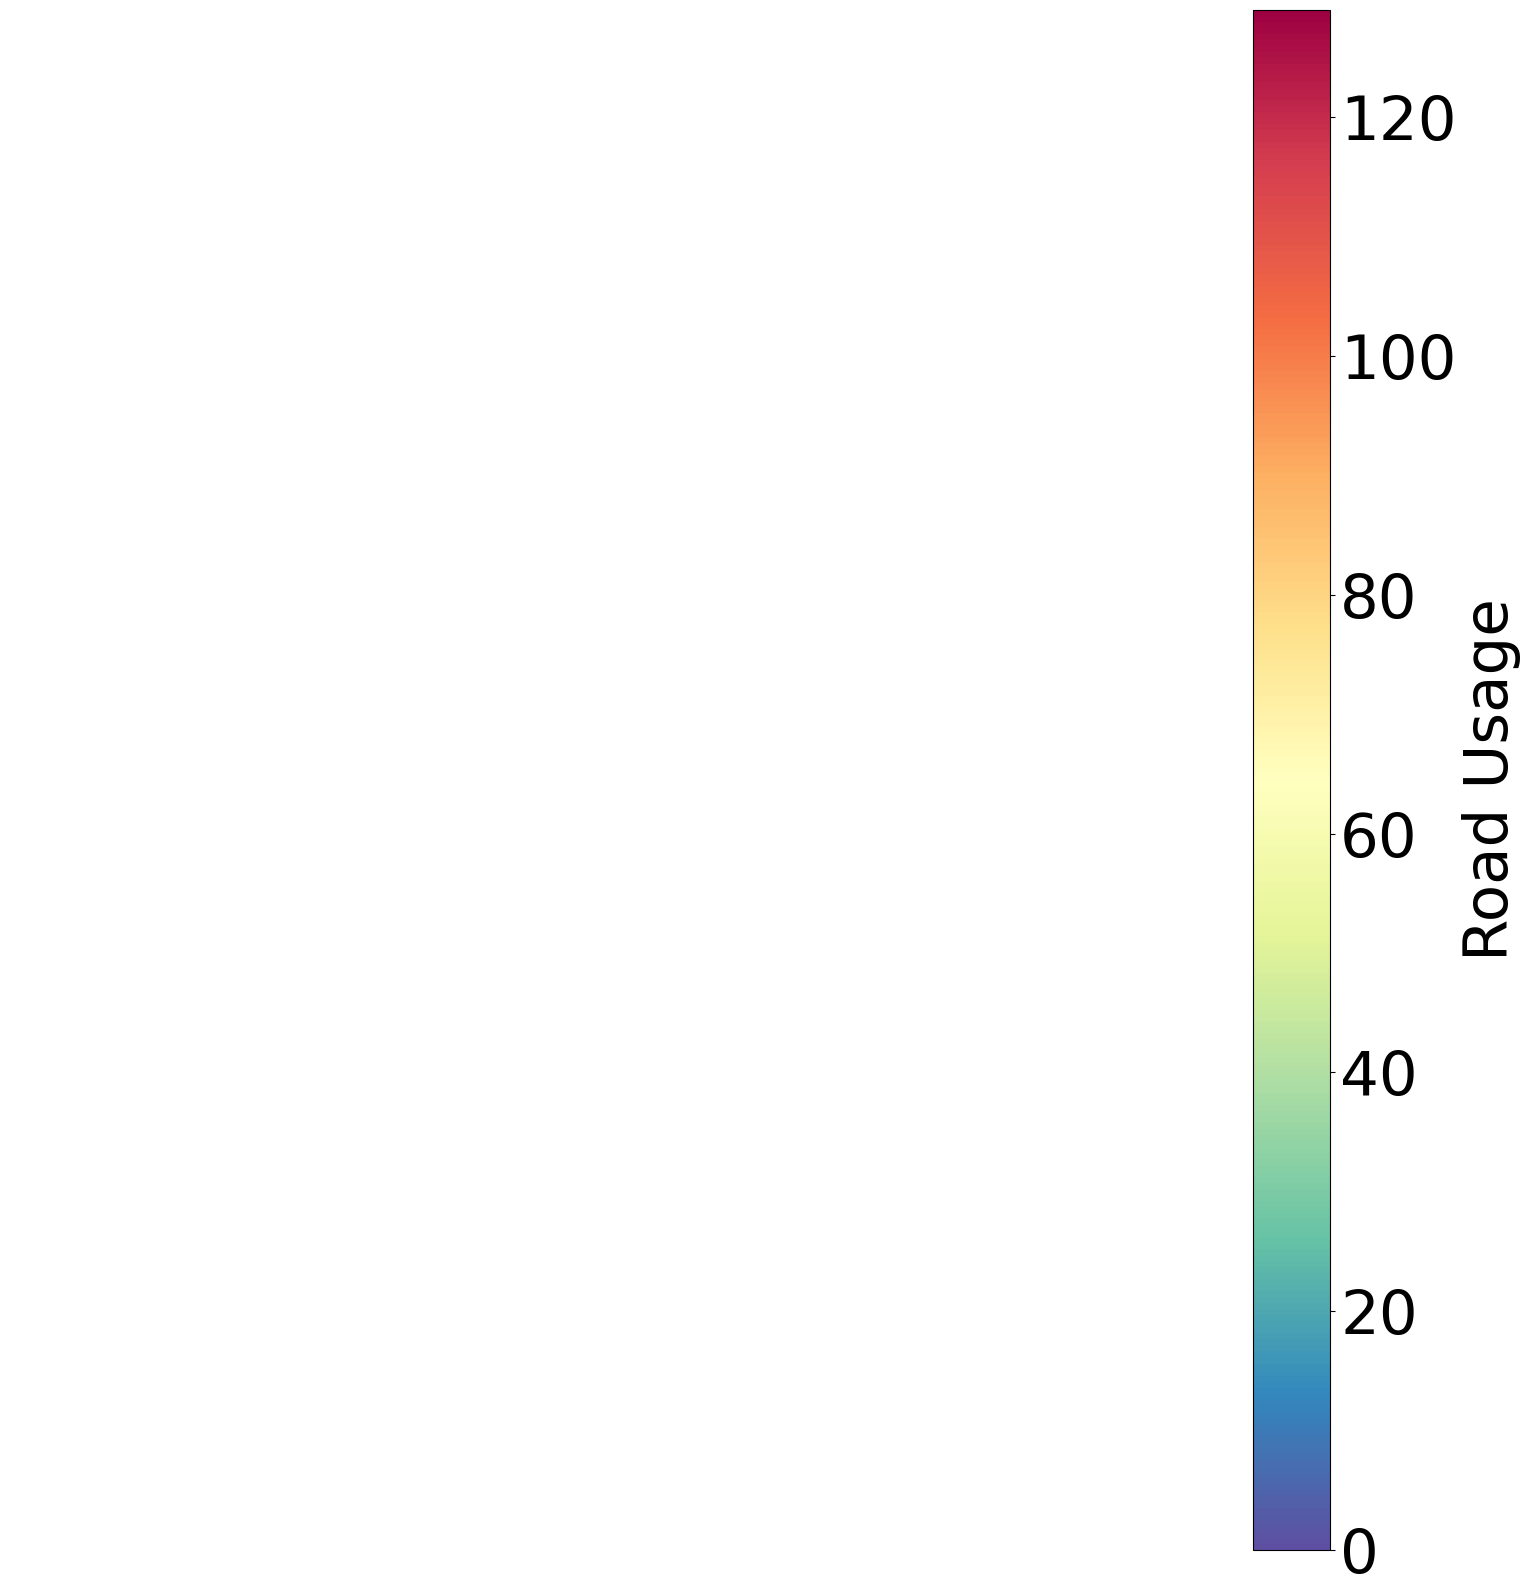

In [15]:
import osmnx as ox
if True:
    graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
    fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20) )
    for edge, usage in zip(road_df_total_use['edge'],road_df_total_use['usage']):
        node1, node2 = int(edge.split("-")[0]), int(edge.split("-")[1])
        #print(node1, node2)
        # Get node coordinates
        x1, y1 = graph.nodes[node1]['x'], graph.nodes[node1]['y']
        x2, y2 = graph.nodes[node2]['x'], graph.nodes[node2]['y']
        # Plot edge

        ax.scatter(x1, y1, color="black", s=2)
        ax.scatter(x2, y2, color="black", s=2)

        ax.plot([x1, x2], [y1, y2], color=mapper.to_rgba(usage), linewidth=4)  # You can adjust color and linewidth as needed





    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima) 
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Spectral_r'), norm =norm) 

    plt.colorbar(sm,label="Road Usage", orientation="vertical") 
    plt.savefig(f'{folder_path}/nyc_road_usage.png', dpi=300, bbox_inches='tight')

    #plt.show()
    ax.clear()

# Vehicle Charge

In [16]:
vehicles_df_iterations = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])
vehicles_df_ids = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])

In [17]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for c in vehicles_df_iterations.columns:
        if c not in temp.keys():
            print(f"{c} is not in the keys")
            temp[c] = []
        temp[c] += [list(vi_df[c])]

vehicles_df_iterations = pd.concat([vehicles_df_iterations, pd.DataFrame.from_dict(temp)], ignore_index=True)

old_charge is not in the keys
new_charge is not in the keys
old_startdepot is not in the keys
new_startdepot is not in the keys


In [18]:
vehicles_df_iterations

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[95.18634616571906, 100.00000000130552, 66.002...","[100.0, 100.0, 76.00219292552326, 96.288165851...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 6177439750, 617..."
1,"[99.99999990738635, 100.00000000080716, 76.002...","[100.0, 100.0, 86.00219293209456, 100.0, 96.64...","[42430044, 42430044, 42430044, 6177439750, 617...","[42432963, 42432963, 42432963, 42430044, 42430..."
2,"[100.00000000395956, 100.00000000121396, 86.00...","[100.0, 100.0, 96.00218947123516, 92.760071784...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 6177439750, 617..."
3,"[98.4965120111335, 64.48254626572152, 96.00218...","[100.0, 74.48254626572152, 100.0, 100.0, 90.07...","[42430044, 42430044, 42430044, 6177439750, 617...","[42432963, 42432963, 42432963, 42430044, 42430..."
4,"[99.9999999807593, 72.83507828806765, 98.42004...","[100.0, 82.83507828806765, 100.0, 98.233845959...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 6177439750, 617..."
5,"[100.0000000067115, 82.83507742757232, 98.7803...","[100.0, 92.83507742757232, 100.0, 100.0, 69.96...","[42430044, 42430044, 42430044, 6177439750, 617...","[42432963, 42432963, 42432963, 42430044, 42430..."
6,"[100.0000000042322, 92.83507742952698, 100.000...","[100.0, 100.0, 100.0, 92.62786679543125, 66.55...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 6177439750, 617..."
7,"[61.07991903224624, 68.4170111552069, 99.99999...","[71.07991903224624, 78.4170111552069, 100.0, 9...","[42430044, 42430044, 42430044, 6177439750, 617...","[42432963, 42432963, 42432963, 42430044, 42430..."
8,"[71.07991814483883, 78.417010900461, 100.00000...","[81.07991814483883, 88.417010900461, 100.0, 88...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 6177439750, 617..."
9,"[81.07991787630469, 88.41701091244703, 99.3664...","[91.07991787630468, 98.41701091244704, 100.0, ...","[42430044, 42430044, 42430044, 6177439750, 617...","[42432963, 42432963, 42432963, 42430044, 42430..."


In [19]:
def simple_plot_vehicle(df, x_values, metric, fig_size=(20, 20)):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    markers = ['o', 's', '^', 'D', 'x', '+', '*', 'P', '|', 'H', 'v', '<', '>', 'd', '.', ',', '_',
               '1', '2', '3', '4', '8', 'h', 'p']  # List of markers
    
    plt.figure(figsize=fig_size)
    for i, id in enumerate(x_values):
        y = df[metric][id]
        x = range(len(y))
        marker = markers[i % len(markers)]  # Cycling through markers for each value
        plt.plot(x, y, marker=marker, label=str(id))  # Using different marker for each value
    plt.legend()
    plt.show()

In [20]:
def simple_plot_vehicle_average_values(df, x_values, metric, fig_size=(20, 20), sli = [], only_values = False):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    y = []
    for id in x_values:
        y +=[ sum(df[metric][id][sli])/len(df[metric][id][sli])]

        
    
    x = range(len(x_values))
    if only_values:
        print(x)
        print(y)
        return y
    plt.figure(figsize=fig_size)
    plt.legend(x_values)
    plt.bar(x, y, tick_label=x_values)
    plt.xlabel('X Values')
    plt.ylabel('Average Metric Value')
    plt.title('Average Metric Value for Each X Value')
    plt.show() 

In [21]:
simple_plot_vehicle_average_values(vehicles_df_iterations, list(vehicles_df_iterations.index), "new_charge", fig_size=(20, 20), sli = slice(0,-1), only_values=True)

range(0, 30)
[93.9425302955629, 93.31931784698115, 88.72800254414517, 86.63662721835503, 84.18226295677105, 83.62799963034719, 83.44893020912976, 79.63481684034626, 79.07168073611282, 76.18706997357546, 72.1099647665988, 69.36359897641334, 68.1976545687132, 65.88238839028489, 61.40502215986274, 56.72656504520523, 56.31012055249589, 53.62320144662732, 54.36898476822457, 50.70836427873343, 49.42647989997709, 45.27849450084737, 43.23125999930175, 43.52917661613712, 43.01073245684086, 42.720555948932585, 43.61941071228511, 43.82810956577606, 41.512041354003614, 38.513052465948434]


[93.9425302955629,
 93.31931784698115,
 88.72800254414517,
 86.63662721835503,
 84.18226295677105,
 83.62799963034719,
 83.44893020912976,
 79.63481684034626,
 79.07168073611282,
 76.18706997357546,
 72.1099647665988,
 69.36359897641334,
 68.1976545687132,
 65.88238839028489,
 61.40502215986274,
 56.72656504520523,
 56.31012055249589,
 53.62320144662732,
 54.36898476822457,
 50.70836427873343,
 49.42647989997709,
 45.27849450084737,
 43.23125999930175,
 43.52917661613712,
 43.01073245684086,
 42.720555948932585,
 43.61941071228511,
 43.82810956577606,
 41.512041354003614,
 38.513052465948434]

In [22]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for j in list(vi_df["id"]):
        if i ==0:
            temp[j] = {c:[vi_df.iloc[j][c]] for c in vehicles_df_ids.columns}
            continue
        for c in vehicles_df_ids.columns:
            temp[j][c] += [vi_df.iloc[j][c] ]
        #print(vi_df.iloc[j]["old_charge"])
       


In [23]:
vehicles_df_ids = pd.concat([vehicles_df_ids, pd.DataFrame.from_dict(temp, orient = "index")], ignore_index=True)

In [24]:
vehicles_df_ids

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[95.18634616571906, 99.99999990738635, 100.000...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
1,"[100.00000000130552, 100.00000000080716, 100.0...","[100.0, 100.0, 100.0, 74.48254626572152, 82.83...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
2,"[66.00219292552326, 76.00219293209456, 86.0021...","[76.00219292552326, 86.00219293209456, 96.0021...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
3,"[86.28816585155289, 94.55092267325898, 82.7600...","[96.28816585155288, 100.0, 92.76007178461148, ...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
4,"[80.16192082198984, 86.64833842907404, 80.4574...","[90.16192082198984, 96.64833842907404, 90.4574...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
5,"[99.99999930395036, 87.46605946572224, 74.2159...","[100.0, 97.46605946572224, 84.21595662724825, ...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
6,"[94.6060086888734, 99.67943199213332, 99.99999...","[100.0, 100.0, 100.0, 99.12043023490116, 100.0...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
7,"[88.55814828022062, 98.5581481330192, 82.32835...","[98.55814828022062, 100.0, 92.32835462744217, ...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
8,"[78.04993017248482, 73.39194879906051, 52.3605...","[88.04993017248482, 83.39194879906051, 62.3605...","[42430044.0, 6177439750.0, 42430044.0, 6177439...","[6177439750.0, 42430044.0, 6177439750.0, 42430..."
9,"[83.20774709593609, 84.51080385272328, 76.5358...","[93.20774709593609, 94.51080385272328, 86.5358...","[6223571524.0, 42432963.0, 6223571524.0, 42432...","[42432963.0, 6223571524.0, 42432963.0, 6223571..."


In [25]:
list_of_values = simple_plot_vehicle_average_values(vehicles_df_ids, list(vehicles_df_ids.index), "new_charge", fig_size=(20, 20), sli = slice(0,-1), only_values=True)

range(0, 24)
[59.75999113058425, 90.79712102155631, 91.21523577635212, 52.568290260898145, 43.00688661307852, 84.64963057270936, 68.66169533434146, 65.61441875528244, 80.71689549961043, 36.53894243695413, 48.63712547544589, 47.8080719741687, 44.61045969459199, 48.835557914120926, 51.20376934295426, 56.62468464337815, 64.84613990871716, 87.63509969022063, 92.01795372863624, 80.31680003051414, 88.88657854025836, 44.16640451769733, 41.00367396370561, 26.346468486202514]


In [26]:
for i,value in enumerate(list_of_values):
    print(f"({i+1},{value})")

(1,59.75999113058425)
(2,90.79712102155631)
(3,91.21523577635212)
(4,52.568290260898145)
(5,43.00688661307852)
(6,84.64963057270936)
(7,68.66169533434146)
(8,65.61441875528244)
(9,80.71689549961043)
(10,36.53894243695413)
(11,48.63712547544589)
(12,47.8080719741687)
(13,44.61045969459199)
(14,48.835557914120926)
(15,51.20376934295426)
(16,56.62468464337815)
(17,64.84613990871716)
(18,87.63509969022063)
(19,92.01795372863624)
(20,80.31680003051414)
(21,88.88657854025836)
(22,44.16640451769733)
(23,41.00367396370561)
(24,26.346468486202514)


In [27]:
def simple_plot_vehicle(df, x_values, metric, fig_size=(20, 20), line_thickness=1, plotte = False):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    markers = ['o', 's', '^', 'D', 'x', '+', '*', 'P', '|', 'H', 'v', '<', '>', 'd', '.', ',', '_',
               '1', '2', '3', '4', '8', 'h', 'p']  # List of markers
    if plotte:
        plt.figure(figsize=fig_size)
    for i, id in enumerate(x_values):
        y = df[metric][id]
        x = range(len(y))
        if not plotte:
            for i in x:
                print(f"({i},{y[i]})")
            
                #print(y)
            print("new plot")
        marker = markers[i % len(markers)]  # Cycling through markers for each value
        if plotte:
            plt.plot(x, y, marker=marker, label=str(id),linewidth=line_thickness,)  # Using different marker for each value
    #plt.legend()
    if plotte:
        plt.show()

In [28]:
simple_plot_vehicle(vehicles_df_ids, [0,1, 9, 13,20], "new_charge", fig_size=(20, 20), line_thickness=3, plotte=False)


(0,100.0)
(1,100.0)
(2,100.0)
(3,100.0)
(4,100.0)
(5,100.0)
(6,100.0)
(7,71.07991903224624)
(8,81.07991814483883)
(9,91.07991787630468)
(10,100.0)
(11,71.72662665850258)
(12,81.72662666628514)
(13,57.56726583860144)
(14,28.695827674638192)
(15,33.506586938732354)
(16,43.506586944122326)
(17,23.564121417981436)
(18,33.564121426165215)
(19,10.350353956832562)
(20,20.350353969963884)
(21,27.5461787624635)
(22,37.546178756971806)
(23,47.54617876241988)
(24,57.54617273620561)
(25,31.43359244207578)
(26,41.43359245865234)
(27,19.35011308794792)
(28,22.839509234991773)
(29,32.21923916917818)
new plot
(0,100.0)
(1,100.0)
(2,100.0)
(3,74.48254626572152)
(4,82.83507828806765)
(5,92.83507742757232)
(6,100.0)
(7,78.4170111552069)
(8,88.417010900461)
(9,98.41701091244704)
(10,100.0)
(11,100.0)
(12,100.0)
(13,100.0)
(14,100.0)
(15,100.0)
(16,100.0)
(17,100.0)
(18,100.0)
(19,100.0)
(20,100.0)
(21,100.0)
(22,100.0)
(23,100.0)
(24,76.38881451854454)
(25,86.38881422097188)
(26,52.053882760748046)
(27,55

# Customer Travel Time

In [29]:
edge_df = pd.DataFrame(columns=["edge", "distance", "time", "capacity"])


In [30]:

temp = {}
for _, edge_info_name in enumerate(edge_infos):
    e_di = pd.read_csv(os.path.join(run_folder, edge_info_name))
    edge_df = pd.concat([edge_df, e_di[edge_df.columns]])
    break
    #edge_df.loc[len(edge_df)] = {c: e_di[c][i] for c in edge_df.columns}


In [31]:
edge_df

,edge,distance,time,capacity
0,42433027-42433020,17.367300,0.347346,10
1,42433020-42433027,17.367300,0.347346,10
2,42433020-42433014,13.231400,0.264628,10
3,42433014-42433020,13.231400,0.264628,10
4,42433014-42442671,5.778400,0.115568,10
...,...,...,...,...
1617,42428020-42428007,57.665000,1.153300,10
1618,42428007-42436492,21.671700,0.433434,10
1619,42428007-42428020,57.665000,1.153300,10
1620,42443054-42450044,21.603000,0.432060,10


In [32]:
edge_df["total_edge_use"] = road_df[road_df.columns[1:]].sum(axis=1)

In [33]:
edge_df["total_distance_traveled"] = edge_df["total_edge_use"]*edge_df["distance"]
edge_df["total_time_traveled"] = edge_df["total_edge_use"]*edge_df["time"]

In [34]:
def get_average_metric(df, metric, n_vehicles):
    return df[metric].sum(), df[metric].sum()/n_vehicles

In [35]:
get_average_metric(edge_df, "total_distance_traveled", 24)

(232760.9166020556, 9698.37152508565)

In [36]:
get_average_metric(edge_df, "total_time_traveled", 24)

(4655.218332041112, 193.967430501713)

In [37]:

for i, road_info_name in enumerate(road_infos):
    #n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    print(ri_df.head())
    break
    #road_df["edge"] = ri_df["edge"]
    #sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    #road_df[n] = sum_rows


   Unnamed: 0               edge    0    1    2    3    4    5    6    7  ...  \
0           0  42433027-42433020  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1           1  42433020-42433027  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2           2  42433020-42433014  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3           3  42433014-42433020  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4           4  42433014-42442671  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    14   15   16   17   18   19   20   21   22   23  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 26 columns]


In [38]:
sum(road_df[road_df.columns[1:]].sum(axis=1))

6890

Requests Served

In [39]:
requests_served = 0
for _, request_info_name in enumerate(requests_info):
    
    r_di = pd.read_csv(os.path.join(run_folder, request_info_name))
    #print(r_di.columns[2:])
    requests_served += r_di[r_di.columns[2:]].astype(int).sum(axis=1).sum()

print(len(r_di.columns[2:]))

50


In [40]:
requests_served

1138

In [41]:
road_df_total = road_df[road_df.columns[1:]].sum(axis=1)

In [42]:
np.count_nonzero(road_df_total)

1213

In [43]:
requests_served/np.count_nonzero(road_df_total)

0.9381698268755152